In [1]:
import pandas as pd
import numpy as np
import random


In [2]:
def perceptron(data):
  df = data
  w =[round(random.random(),4) for i in range(0,df.shape[1])]
  #w = np.array([0.5,-0.5,0.5])
  w = np.array(w)
  
  x0 =[1 for i in range(0,df.shape[0])]
  df.insert(0,'x0',x0)
  
  
  print('Initial Weights : ',w)
  print(df)
  epoc=1
  wTx = 0
  while(True):
    wTx = 0
    w_old = w 
    for i in range(0,df.shape[0]):
      wTx = 0
      X = df.iloc[i,:df.shape[1]-1].to_numpy()
      #print(X)
      #print(w)
      for j in range(0,len(X)):
        wTx += X[j]*w[j]
      #print(wTx)
      if(wTx >= 0 ):
        y_hat = 1
      else :
        y_hat = 0
      #print('y_hat',y_hat)
      #print('y ',df.iloc[i][-1])
      #print(df.iloc[i][-1] - y_hat)
      #print(' w new',w+(df.iloc[i][-1] - y_hat)*X)
      w = w+(df.iloc[i][-1] - y_hat)*X
      #print(w)
    print('epoc ',epoc,': ','weight :',w)
    flag = 1
    for i in range(0,len(w)):
      if abs(w[i]-w_old[i]) == 0 :
        continue
      else:
        flag=0
    if flag == 1 :
      print('epoc',epoc)
      print('weight',w)
      break
    else :
      epoc += 1
  return w 



In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
iris_df=sns.load_dataset("iris")

In [5]:
iris_df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
iris_df.shape

(150, 5)

In [7]:
iris_df=iris_df.loc[iris_df['species'].isin(['setosa','versicolor'])]
iris_df.shape

(100, 5)

In [8]:
lblenc=LabelEncoder()
iris_df['species_cat']=lblenc.fit_transform(iris_df['species'])

In [9]:
iris_df.drop('species',axis=1,inplace=True)

In [10]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_cat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df=iris_df[['sepal_length','sepal_width','species_cat']]

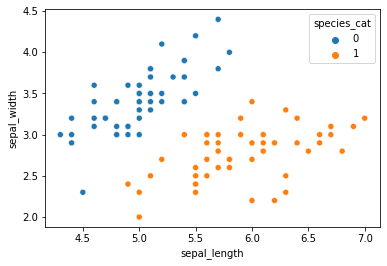

In [12]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue='species_cat')

In [13]:
weights1=perceptron(df)

Initial Weights :  [0.5187 0.6141 0.4973]
    x0  sepal_length  sepal_width  species_cat
0    1           5.1          3.5            0
1    1           4.9          3.0            0
2    1           4.7          3.2            0
3    1           4.6          3.1            0
4    1           5.0          3.6            0
..  ..           ...          ...          ...
95   1           5.7          3.0            1
96   1           5.7          2.9            1
97   1           6.2          2.9            1
98   1           5.1          2.5            1
99   1           5.7          2.8            1

[100 rows x 4 columns]
epoc  1 :  weight : [0.5187 2.5141 0.1973]
epoc  2 :  weight : [ 0.5187  4.4141 -0.1027]
epoc  3 :  weight : [ 0.5187  6.3141 -0.4027]
epoc  4 :  weight : [ 0.5187  8.2141 -0.7027]
epoc  5 :  weight : [-0.4813  5.2141 -4.0027]
epoc  6 :  weight : [-0.4813  7.1141 -4.3027]
epoc  7 :  weight : [-0.4813  9.0141 -4.6027]
epoc  8 :  weight : [-0.4813 10.9141 -4.9027]
epoc 

In [14]:
c = -1*weights1[0]/weights1[2]
m = -1*weights1[1]/weights1[2]
x_vals = np.array([i for i in range(0,10)])

y_vals = c + m * x_vals


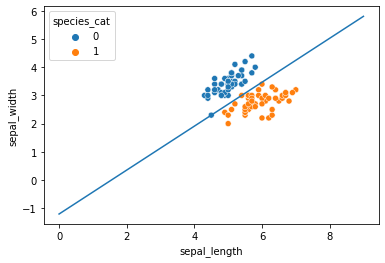

In [15]:
sns.scatterplot(data=iris_df, x="sepal_length", y="sepal_width",hue='species_cat')
plt.plot(x_vals, y_vals)